In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import ipywidgets as widgets
from IPython.display import display
from enhancement_analysis import *
from fit_functions import *

%matplotlib inline

In [2]:
folder = '20190228'

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

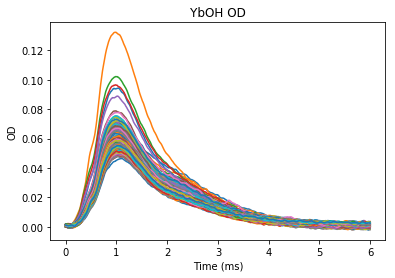

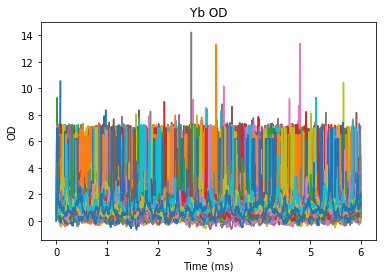

In [30]:
# All Yb light blocked

start = 0
stop = 200
skips = []

dataset = calculateSeriesODFromRaw(folder,start,stop,skips)
YbOH,Yb,times = processScan(dataset,start_stop=[0,6])

In [31]:
times_all = [times]
YbOH_all = [YbOH]
labels_all = ['0 to 200']


 201 to 866


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)


 867 to 1379


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)


 1380 to 2095


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)


 2096 to 3369


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

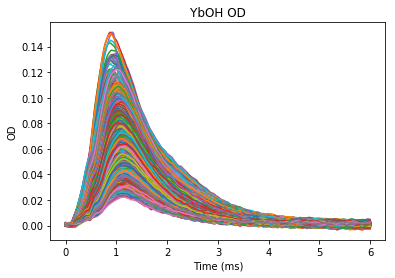

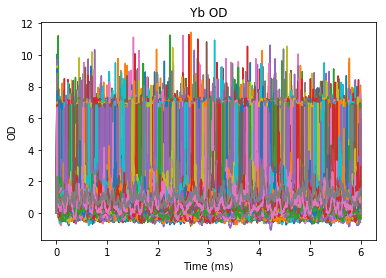

In [32]:
start_files=[201,867,1380,2096]
stop_files=[866,1379,2095,3369]
labels=['201 to 866','867 to 1379','1380 to 2095','2096 to 3369']
skips = []
         
for _start,_stop,_label in zip(start_files,stop_files,labels):
    print('\n',_label)
    if _start == 867:
        skips = [1192]
    else:
        skips = []
    dataset = calculateSeriesODFromRaw(folder,_start,_stop,skips)
    YbOH,Yb,times = processScan(dataset,start_stop=[0,6])
    times_all.append(times)
    YbOH_all.append(YbOH)
    labels_all.append(_label)

In [34]:
YbOH_save = YbOH_all
times_save = times_all
YbOH_container = []
time_container = []
for i in range(len(YbOH_all)):
    if i==0:
        x = YbOH_all[i]+YbOH_all[i+1]
        y = times_all[i]+list(np.array(times_all[i+1])+times_all[i][-1])
        YbOH_container.append(np.array(x))
        time_container.append(np.array(y))
    elif i==1:
        pass
    else:
        YbOH_container.append(np.array(YbOH_all[i]))
        time_container.append(np.array(times_all[i]))
        
YbOH_all = YbOH_container
times_all = time_container
_labels = labels_all[2:]
labels_all = ['0 to 866',_labels]

In [37]:
writeCSVrows(YbOH_all,'Processed_20190228/YbOH_integrated.csv')
writeCSVrows(times_all,'Processed_20190228/times.csv')
writeCSVrows(labels_all,'Processed_20190228/row_labels.csv')

Done! Array written to Processed_20190228/YbOH_integrated.csv
Done! Array written to Processed_20190228/times.csv
Done! Array written to Processed_20190228/row_labels.csv


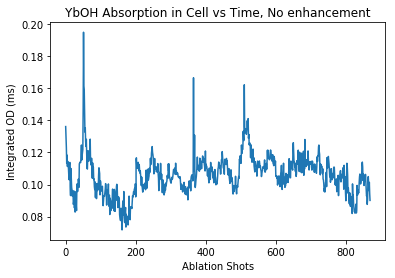

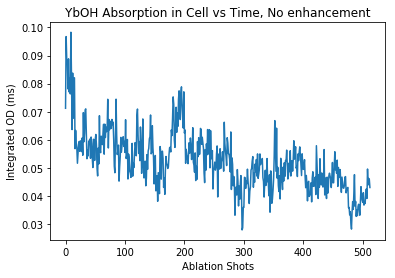

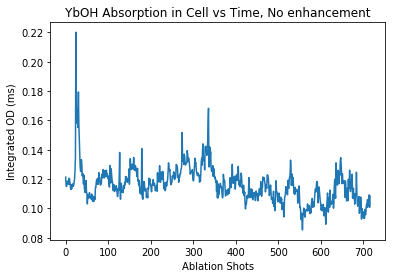

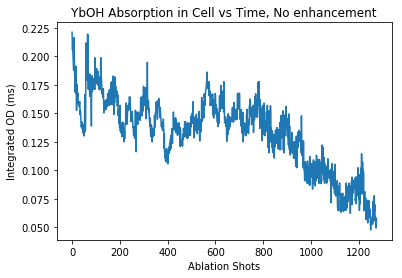

In [39]:
for _YbOH,_time in zip(YbOH_all,times_all):
    plt.figure()
    plt.title('YbOH Absorption in Cell vs Time, No enhancement')
    plt.ylabel('Integrated OD (ms)')
    plt.xlabel('Ablation Shots')
    plt.plot(np.array(_time)*1.427,_YbOH)

In [36]:
len(YbOH_all)

4

OK, with the no-enhancement scans out of the way, let's see if we can deal with these back and forth scans. 

For the first scan, P = 200 mW. The upper limit was 0.354, and the lower limit was 0.341. This corresponds to 0.013 piezo units. According to the Mattise software, this is a scan range of 1268 MHz. That gives us a conversion factor 1268 MHz/0.013 = 97.54 MHz/0.001 piezo units

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
from enhancement_analysis import *
from fit_functions import *
from low_level import *

%matplotlib inline

In [2]:
folder = '20190228'

In [3]:
Start = 6720
Stop = 6929
dataset = calculateSeriesOD(folder,Start,Stop)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

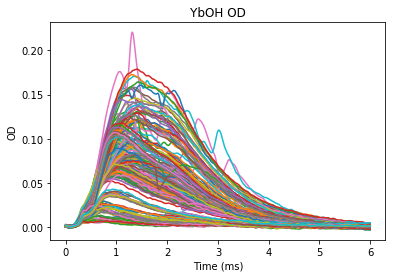

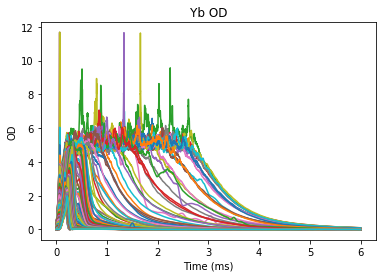

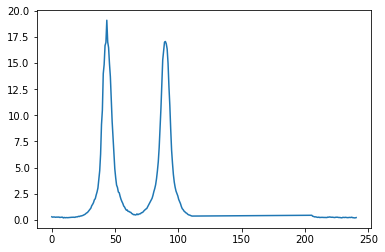

In [6]:
YbOH,Yb,times = processData(dataset,[0,6])
plt.figure()
plt.plot(times,Yb)

210
95
115
210


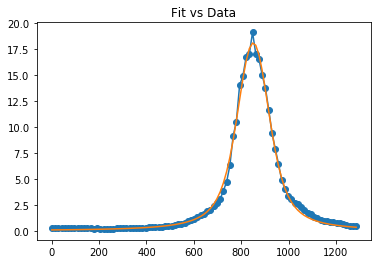

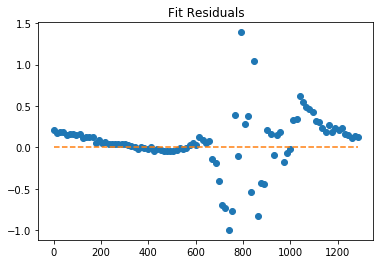

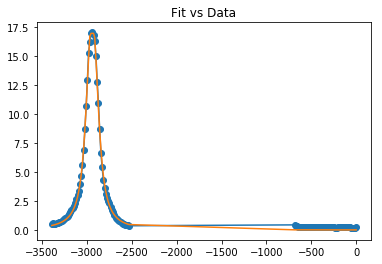

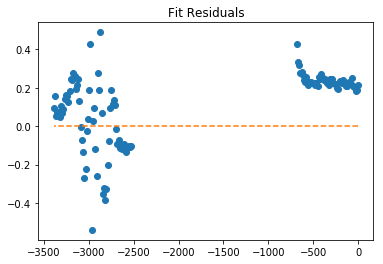

In [5]:
initial_up=True
speed = 19.52 #MHz/s
num_peaks = 2
YbOH_arr,Yb_arr,freq_arr= processBackAndForth(Yb,YbOH,times,speed,num_peaks,initial_up)

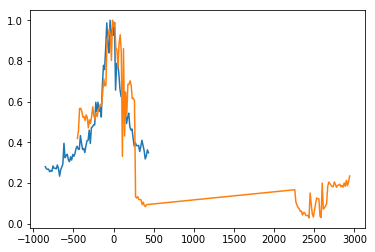

In [20]:
plt.figure()
for _f,_YbOH in zip(freq_arr,YbOH_arr):
    plt.plot(_f,_YbOH/_YbOH.max())

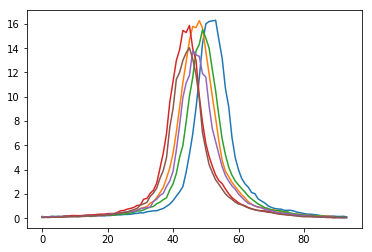

In [76]:
for i in range(6):
    plt.plot(res[1][i])

In [64]:
from math import ceil
def method2(Yb_spectra,YbOH_spectra,time_array,freq_range,num_peaks):
    Yb = np.array(Yb_spectra)
    YbOH = np.array(YbOH_spectra)
    times = np.array(time_array)
    peak_indices, properties = find_peaks(Yb,height=Yb.max()/2,distance=(len(Yb)/(num_peaks+1)))
    if len(peak_indices) != num_peaks:
        print('Error: found {} peaks instead of {}'.format(len(peak_indices),num_peaks))
    size = int(round(len(Yb)/num_peaks))
    Yb_split = []
    YbOH_split = []
    times_split = []
    for i in range(num_peaks):
        if i == 0:
            start = 0
        else:
            start = end
        if i != num_peaks-1:
            end = start+size
        else:
            end = None
        s = slice(start,end)
        Yb_split.append(Yb[s])
        YbOH_split.append(YbOH[s])
        times_split.append(times[s])
        print(len(Yb[s]))
    return [YbOH_split,Yb_split,times_split]

In [65]:
res2 = method2(Yb,YbOH,times,0,6)

93
93
93
93
93
92


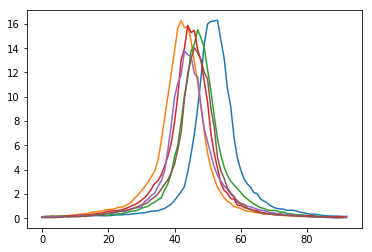

In [59]:
for i in range(6):
    plt.plot(res2[1][i])

In [66]:
not True

False

In [67]:
not False

True

In [22]:
x = np.array([0,2,4,5,6])
print(np.where(x==4.5)[0][0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [16]:
np.where(x>3)

(array([2, 3, 4], dtype=int64),)